##### addded team position as input variable

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
import seaborn

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# file_path = r"../../../data/NCAA/input_data/ncaa_2024_input_data_v001.csv"
# file_path_2024 = r"../../../data/NFL/input_data/nfl_2024_player_stats_v001.csv"
# team_stats_file_path_2024 = r"../../../data/NFL/input_data/nfl_2024_team_stats_v002.csv"
# file_path_2023 = r"../../../data/NFL/input_data/nfl_2023_player_stats_v001.csv"
# team_stats_file_path_2023 = r"../../../data/NFL/input_data/nfl_2023_team_stats_v001.csv"
# file_path_2022 = r"../../../data/NFL/input_data/nfl_2022_player_stats_v001.csv"
# team_stats_file_path_2022 = r"../../../data/NFL/input_data/nfl_2022_team_stats_v001.csv"
# file_path_2021 = r"../../../data/NFL/input_data/nfl_2021_player_stats_v001.csv"
# team_stats_file_path_2021 = r"../../../data/NFL/input_data/nfl_2021_team_stats_v001.csv"
# file_path_2020 = r"../../../data/NFL/input_data/nfl_2020_player_stats_v001.csv"
# team_stats_file_path_2020 = r"../../../data/NFL/input_data/nfl_2020_team_stats_v001.csv"

team_reg_file_path_2024 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2024_team_stats_reg_v001.csv"
team_pst_file_path_2024 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2024_team_stats_pst_v001.csv"
team_reg_file_path_2023 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2023_team_stats_reg_v001.csv"
team_pst_file_path_2023 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2023_team_stats_pst_v001.csv"

player_reg_file_path_2024 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2024_player_stats_reg_v001.csv"
player_pst_file_path_2024 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2024_player_stats_pst_v001.csv"
player_reg_file_path_2023 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2023_player_stats_reg_v001.csv"
player_pst_file_path_2023 = r"../../../data/NFL/input_data/reg_pst_player_teams_input_data/nfl_2023_player_stats_pst_v001.csv"

# df = pd.read_csv(file_path_)
# df_team = pd.read_excel(team_stats_file_path)
# df = pd.read_excel(file_path, sheet_name= 0, skiprows=[1])

In [3]:
def read_csv(list):
    results = []
    for addr in list:
        df = pd.read_csv(addr)
        # print(df.head())
        results.append(df)
    return results


team_df_list = read_csv([team_reg_file_path_2024, team_pst_file_path_2024, team_reg_file_path_2023, team_pst_file_path_2023])
players_df_list = read_csv([player_reg_file_path_2024, player_pst_file_path_2024, player_reg_file_path_2023, player_pst_file_path_2023])

# players_df_list = read_csv([file_path_2020, file_path_2021, file_path_2022, file_path_2023, file_path_2024])
# team_df_list = read_csv([ team_stats_file_path_2020, team_stats_file_path_2021, team_stats_file_path_2022, team_stats_file_path_2023, team_stats_file_path_2024])

C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_21272\1958992641.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(addr)
C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_21272\1958992641.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(addr)


In [4]:
# print(players_df_list)

In [5]:
df = pd.concat(players_df_list)
df_team = pd.concat(team_df_list)

In [6]:
df.head()
df_team.head()

,game_id,game_sr_id,team_name,team_id,team_sr_id,opponent_name,opponent_id,opponent_sr_id,team_market,team_alias,game_date,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_tlost,rushing_tlost_yards,rushing_yards,rushing_longest,rushing_redzone_attempts,rushing_first_downs,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,receiving_targets,receiving_receptions,receiving_avg_yards,receiving_yards,receiving_touchdowns,receiving_yards_after_catch,receiving_longest,receiving_longest_touchdown,receiving_redzone_targets,receiving_air_yards,receiving_first_downs,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,punts_attempts,punts_yards,punts_net_yards,punts_blocked,punts_touchbacks,punts_inside_20,punts_return_yards,punts_avg_net_yards,punts_avg_yards,punts_longest,punts_hang_time,punts_avg_hang_time,punt_returns_avg_yards,punt_returns_yards,punt_returns_longest,punt_returns_touchdowns,punt_returns_faircatches,punt_returns_number,penalties_penalties,penalties_yards,penalties_first_downs,passing_attempts,passing_completions,passing_cmp_pct,passing_interceptions,passing_sack_yards,passing_rating,passing_touchdowns,passing_avg_yards,passing_sacks,passing_longest,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_net_yards,passing_yards,passing_first_downs,passing_int_touchdowns,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_avg_pocket_time,passing_batted_passes,passing_on_target_throws,misc_returns_yards,misc_returns_touchdowns,misc_returns_blk_fg_touchdowns,misc_returns_blk_punt_touchdowns,misc_returns_fg_return_touchdowns,misc_returns_ez_rec_touchdowns,misc_returns_number,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_net_attempts,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_sp_own_fumble_recoveries,defense_sp_opp_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,defense_three_and_outs_forced,defense_fourth_down_stops,first_downs_pass,first_downs_penalty,first_downs_rush,first_downs_total,interceptions_return_yards,interceptions_returned,interceptions_number,touchdowns_pass,touchdowns_rush,touchdowns_total_return,touchdowns_total,touchdowns_fumble_return,touchdowns_int_return,touchdowns_kick_return,touchdowns_punt_return,touchdowns_other,efficiency_goaltogo_attem

In [7]:
df.columns.to_list()

['game_id',
 'game_sr_id',
 'player_name',
 'player_id',
 'team_name',
 'team_id',
 'team_sr_id',
 'opponent_name',
 'opponent_id',
 'opponent_sr_id',
 'team_market',
 'team_alias',
 'team_position',
 'team_jersey',
 'game_date',
 'rushing_first_downs',
 'rushing_avg_yards',
 'rushing_attempts',
 'rushing_touchdowns',
 'rushing_yards',
 'rushing_longest',
 'rushing_redzone_attempts',
 'rushing_tlost',
 'rushing_tlost_yards',
 'rushing_broken_tackles',
 'rushing_kneel_downs',
 'rushing_scrambles',
 'rushing_yards_after_contact',
 'venue_id',
 'venue_name',
 'venue_city',
 'venue_state',
 'venue_country',
 'venue_zip',
 'venue_address',
 'venue_capacity',
 'venue_surface',
 'venue_roof_type',
 'venue_sr_id',
 'venue_location_lat',
 'venue_location_lng',
 'receiving_first_downs',
 'receiving_receptions',
 'receiving_targets',
 'receiving_yards',
 'receiving_avg_yards',
 'receiving_longest',
 'receiving_touchdowns',
 'receiving_yards_after_catch',
 'receiving_redzone_targets',
 'receiving_

In [8]:
df[df['team_position'] == 'WR'].head()

,game_id,game_sr_id,player_name,player_id,team_name,team_id,team_sr_id,opponent_name,opponent_id,opponent_sr_id,team_market,team_alias,team_position,team_jersey,game_date,rushing_first_downs,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_yards,rushing_longest,rushing_redzone_attempts,rushing_tlost,rushing_tlost_yards,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,venue_id,venue_name,venue_city,venue_state,venue_country,venue_zip,venue_address,venue_capacity,venue_surface,venue_roof_type,venue_sr_id,venue_location_lat,venue_location_lng,receiving_first_downs,receiving_receptions,receiving_targets,receiving_yards,receiving_avg_yards,receiving_longest,receiving_touchdowns,receiving_yards_after_catch,receiving_redzone_targets,receiving_air_yards,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,receiving_longest_touchdown,punts_attempts,punts_yards,punts_avg_yards,punts_blocked,punts_longest,punts_touchbacks,punts_inside_20,punts_avg_net_yards,punts_return_yards,punts_net_yards,punts_hang_time,punts_avg_hang_time,punt_returns_yards,punt_returns_avg_yards,punt_returns_touchdowns,punt_returns_longest,punt_returns_faircatches,punt_returns_number,penalties_first_downs,penalties_penalties,penalties_yards,passing_first_downs,passing_attempts,passing_completions,passing_cmp_pct,passing_yards,passing_avg_yards,passing_sacks,passing_sack_yards,passing_touchdowns,passing_longest,passing_interceptions,passing_rating,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_int_touchdowns,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_avg_pocket_time,passing_batted_passes,passing_on_target_throws,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_sp_own_fumble_recoveries,defense_sp_opp_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,rushing_longest_touchdown
3,0066198b-955a-4008-be7e-dc52522b4d74,sr:match:50128561,Jake Bobo,7d80dd50-e9f5-11ed-9c34-3f26f2e7ed88,Seahawks,3d08af9e-c767-4f88-a7dc-b920c6d2b4a8,sr:competitor:4430,Cardinals,de760528-1dc0-416a-a978-b510d20692ff,sr:competitor:4412,Seattle,SEA,WR,19.0,2024-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c6b9e5df-c9e4-434c-b3e6-83928f11cbda,Lumen Field,Seattle,WA,USA,98134.0,80

In [9]:
df.team_position.unique()

array(['RB', 'QB', 'WR', 'TE', 'P', 'CB', 'K', 'DT', 'FS', 'SS', 'DE',
       'OLB', 'LB', 'NT', 'OL', 'DL', 'SAF', 'C', 'OT', 'G', 'DB', 'MLB',
       'T', 'OG', 'FB', 'LS'], dtype=object)

In [10]:
df.columns.to_list()

['game_id',
 'game_sr_id',
 'player_name',
 'player_id',
 'team_name',
 'team_id',
 'team_sr_id',
 'opponent_name',
 'opponent_id',
 'opponent_sr_id',
 'team_market',
 'team_alias',
 'team_position',
 'team_jersey',
 'game_date',
 'rushing_first_downs',
 'rushing_avg_yards',
 'rushing_attempts',
 'rushing_touchdowns',
 'rushing_yards',
 'rushing_longest',
 'rushing_redzone_attempts',
 'rushing_tlost',
 'rushing_tlost_yards',
 'rushing_broken_tackles',
 'rushing_kneel_downs',
 'rushing_scrambles',
 'rushing_yards_after_contact',
 'venue_id',
 'venue_name',
 'venue_city',
 'venue_state',
 'venue_country',
 'venue_zip',
 'venue_address',
 'venue_capacity',
 'venue_surface',
 'venue_roof_type',
 'venue_sr_id',
 'venue_location_lat',
 'venue_location_lng',
 'receiving_first_downs',
 'receiving_receptions',
 'receiving_targets',
 'receiving_yards',
 'receiving_avg_yards',
 'receiving_longest',
 'receiving_touchdowns',
 'receiving_yards_after_catch',
 'receiving_redzone_targets',
 'receiving_

In [11]:
# df = df.drop(columns=['team'])
df.team_position.unique()

array(['RB', 'QB', 'WR', 'TE', 'P', 'CB', 'K', 'DT', 'FS', 'SS', 'DE',
       'OLB', 'LB', 'NT', 'OL', 'DL', 'SAF', 'C', 'OT', 'G', 'DB', 'MLB',
       'T', 'OG', 'FB', 'LS'], dtype=object)

In [12]:
df.receiving_yards.value_counts(normalize=True).sort_index()

receiving_yards
-13.0     0.000109
-11.0     0.000109
-10.0     0.000109
-9.0      0.000328
-7.0      0.000437
-6.0      0.000656
-5.0      0.001202
-4.0      0.001748
-3.0      0.002404
-2.0      0.003168
-1.0      0.004807
 0.0      0.116792
 1.0      0.011144
 2.0      0.016716
 3.0      0.016388
 4.0      0.023599
 5.0      0.027423
 6.0      0.027969
 7.0      0.022288
 8.0      0.022616
 9.0      0.026002
 10.0     0.018792
 11.0     0.023053
 12.0     0.021086
 13.0     0.020649
 14.0     0.017262
 15.0     0.018901
 16.0     0.018355
 17.0     0.015296
 18.0     0.014531
 19.0     0.017044
 20.0     0.013110
 21.0     0.012455
 22.0     0.012783
 23.0     0.012346
 24.0     0.012564
 25.0     0.011799
 26.0     0.010925
 27.0     0.011581
 28.0     0.013329
 29.0     0.009505
 30.0     0.010598
 31.0     0.009724
 32.0     0.008959
 33.0     0.010270
 34.0     0.009505
 35.0     0.009396
 36.0     0.009287
 37.0     0.008303
 38.0     0.007429
 39.0     0.009177
 40.0     0.007

In [13]:
# # Ensure 'game_date' is in datetime format
# df['game_date'] = pd.to_datetime(df['game_date'])

# print("Original DataFrame head:")
# print(df.head())
# print("\n" + "="*50 + "\n")

# # --- Player-Level Offensive Metrics ---

# # player_total_shots
# df['player_total_shots'] = df['shots_on_target'] + df['shots_off_target'] + df['shots_blocked']

# # player_shot_accuracy
# # Use np.where to handle division by zero (if player_total_shots is 0, accuracy is 0)
# # df['player_shot_accuracy'] = np.where(
# #     df['player_total_shots'] == 0,
# #     0,
# #     df['shots_on_target'] / df['player_total_shots']
# # )

# # player_goal_contribution
# df['player_goal_contribution'] = df['goals_scored'] + df['assists']

# # player_offensive_action_ratio
# # Use np.where to handle division by zero
# # df['player_offensive_action_ratio'] = np.where(
# #     df['player_total_shots'] == 0,
# #     0,
# #     (df['goals_scored'] + df['assists'] + df['shots_on_target']) / df['player_total_shots']
# # )

# # player_aerial_goal_ratio
# # Use np.where to handle division by zero
# df['player_aerial_goal_ratio'] = np.where(
#     df['goals_scored'] == 0,
#     0,
#     df['goals_by_head'] / df['goals_scored']
# )

# # --- Player-Level Game Participation & Discipline Metrics ---

# # player_discipline_score
# df['player_discipline_score'] = df['yellow_cards'] + (df['red_cards'] * 2) + df['yellow_red_cards']

# # is_starter (already available as 'starter', but explicitly naming for clarity)
# # No calculation needed, just for conceptual mapping
# df['is_starter'] = df['starter']

# # player_played_full_game
# df['player_played_full_game'] = ((df['starter'] == 1) & (df['substituted_out'] == 0)).astype(int)

# # --- Venue/Game Context Metrics ---

# # attendance_ratio
# # Use np.where to handle division by zero
# df['attendance_ratio'] = np.where(
#     df['venue_capacity'] == 0,
#     0,
#     df['attendance'] / df['venue_capacity']
# )


# # --- Time-Based Features (Derived from game_date) ---

# # game_day_of_week
# df['game_day_of_week'] = df['game_date'].dt.dayofweek # Monday=0, Sunday=6

# # game_month
# df['game_month'] = df['game_date'].dt.month

# # game_year
# df['game_year'] = df['game_date'].dt.year

In [14]:
# df.team.unique()

In [15]:
# games_played = df.groupby('player_id')['game_id'].count().reset_index()

# print(games_played.head())

# # Filter for players who have played at least 2 games
# players_at_least_2_games = games_played[games_played['game_id'] >= 2 ]

# print(players_at_least_2_games.head())
# # Get the number of unique player IDs in the filtered result
# unique_players_count = players_at_least_2_games.nunique()

# print(df['player_id'].describe(), unique_players_count)

# # df[df['player_id'].isin(players_at_least_2_games.player_id.unique())]['date'].count()

In [16]:
# round(df.notnull().sum()* 100/len(df),2)
print(df.describe())

# Assuming your final training data is in a DataFrame called final_training_df
variable = 'game_id'
# print(df[variable].value_counts(), df[variable].describe())

# plt.figure(figsize=(10, 6))
# sns.histplot(df[variable], kde=True, discrete=True)
# plt.title(f'Histogram of {variable} with Continuous Bars and KDE')
# plt.xlabel('Number of outs_ktotal')
# plt.ylabel('Frequency / Density')
# plt.show()

        team_jersey  rushing_first_downs  rushing_avg_yards  rushing_attempts  \
count  38770.000000          4768.000000        4768.000000       4768.000000   
mean      42.657622             1.585361           4.176858          6.444421   
std       32.111917             1.827652           4.084253          6.199015   
min        0.000000             0.000000         -23.000000          0.000000   
25%       15.000000             0.000000           2.000000          2.000000   
50%       33.000000             1.000000           3.750000          4.000000   
75%       74.000000             2.000000           5.600000         10.000000   
max       99.000000            15.000000          61.000000         37.000000   

       rushing_touchdowns  rushing_yards  rushing_longest  \
count         4768.000000    4768.000000      4768.000000   
mean             0.218331      27.905201        10.777894   
std              0.500832      32.109457        10.756236   
min              0.000000 

In [17]:
df = df[df['team_position'].isin(['WR', 'TE'])]

In [18]:
df.describe()

,team_jersey,rushing_first_downs,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_yards,rushing_longest,rushing_redzone_attempts,rushing_tlost,rushing_tlost_yards,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,venue_capacity,venue_location_lat,venue_location_lng,receiving_first_downs,receiving_receptions,receiving_targets,receiving_yards,receiving_avg_yards,receiving_longest,receiving_touchdowns,receiving_yards_after_catch,receiving_redzone_targets,receiving_air_yards,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,receiving_longest_touchdown,punts_attempts,punts_yards,punts_avg_yards,punts_blocked,punts_longest,punts_touchbacks,punts_inside_20,punts_avg_net_yards,punts_return_yards,punts_net_yards,punts_hang_time,punts_avg_hang_time,punt_returns_yards,punt_returns_avg_yards,punt_returns_touchdowns,punt_returns_longest,punt_returns_faircatches,punt_returns_number,penalties_first_downs,penalties_penalties,penalties_yards,passing_first_downs,passing_attempts,passing_completions,passing_cmp_pct,passing_yards,passing_avg_yards,passing_sacks,passing_sack_yards,passing_touchdowns,passing_longest,passing_interceptions,passing_rating,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_int_touchdowns,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_avg_pocket_time,passing_batted_passes,passing_on_target_throws,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_sp_own_fumble_recoveries,defense_sp_opp_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,rushing_longest_touchdown
count,7793.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.0,767.000000,767.000000,7794.000000,7794.000000,7794.000000,6801.000000,6801.000000,6801.000000,6801.000000,6801.000000,6423.000000,6801.000000,6801.000000,6801.000000,6801.000000,6801.000000,6801.000000,6801.000000,6801.000000,1284.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,960.000000,960.000000,960.000000,872.000000,960.000000,960.000000,936.000000,936.000000,936.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,43.000000,60.000000,49.000000,6.000000,60.000000,60.000000,60.0,

In [19]:
df.shape

(7794, 188)

In [20]:
len(df.game_id.unique())

570

In [21]:
df.isna().sum()

game_id                                0
game_sr_id                             0
player_name                            0
player_id                              0
team_name                              0
team_id                                0
team_sr_id                             0
opponent_name                          0
opponent_id                            0
opponent_sr_id                         0
team_market                            0
team_alias                             0
team_position                          0
team_jersey                            1
game_date                              0
rushing_first_downs                 7027
rushing_avg_yards                   7027
rushing_attempts                    7027
rushing_touchdowns                  7027
rushing_yards                       7027
rushing_longest                     7027
rushing_redzone_attempts            7027
rushing_tlost                       7027
rushing_tlost_yards                 7027
rushing_broken_t

In [22]:
df = df[df['receiving_yards'].notna()]
df.shape

(6801, 188)

In [23]:
df.isna().sum()

game_id                                0
game_sr_id                             0
player_name                            0
player_id                              0
team_name                              0
team_id                                0
team_sr_id                             0
opponent_name                          0
opponent_id                            0
opponent_sr_id                         0
team_market                            0
team_alias                             0
team_position                          0
team_jersey                            0
game_date                              0
rushing_first_downs                 6106
rushing_avg_yards                   6106
rushing_attempts                    6106
rushing_touchdowns                  6106
rushing_yards                       6106
rushing_longest                     6106
rushing_redzone_attempts            6106
rushing_tlost                       6106
rushing_tlost_yards                 6106
rushing_broken_t

In [24]:
# Function to impute missing values based on group mean
def impute_by_group(df, group_cols, impute_cols):
    for col in impute_cols:
        df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.mean()))
    return df

##### function to treat outliers

In [25]:
def treat_outliers(df, columns):
    for column in columns:
        q3 = df[column].quantile(0.75)
        q1 = df[column].quantile(0.25)
        
        IQR = q3 - q1
        upper_whisker = q3 + 1.5 * IQR
        lower_whisker = q1 - 1.5 * IQR

        df[column] = np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))
    return df

#### Function to calcuate the aggregate metrics for player at career and opponent level

In [26]:
def calculate_agg_features(df, feat_trans_dict, rolling_window, trans_level, min_games = 1):

    '''
    df will be the dataframe containing the raw data to be transformed

    feat_trans_dict is a dictionary that has column - type of transformation as a key value pair. ex. {'ERA' : pd.Series.mean}

    rolling window represents the window for which the aggregation to be done

    trans_level indicates if the pitcher metric aggregation to be done for a specific opponent or entire career
    '''  

    for level in trans_level:
        if level == 'opponent':
            grouped_cols = ['player_id', 'opponent_name']
        else:
            grouped_cols = ['player_id']
        sort_cols = grouped_cols + ['game_date']

        df = df.sort_values(by=sort_cols)
        # print(df.columns)

        for col, transform_type in feat_trans_dict.items():
            # print(col, transform_type)
            df[f'shifted_{col}'] = df.groupby(grouped_cols)[col].shift(1)
            if transform_type == 'sum':
                df[f'{col}_prev_{rolling_window}_games_{level}_sum'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).sum())
            elif transform_type == 'mean':
                df[f'{col}_prev_{rolling_window}_games_{level}_mean'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).mean())
            df.drop(columns=[ f'shifted_{col}'], inplace=True)
    return df


#### Function to calcuate the aggregate metrics for team at career and opponent level

In [27]:
def calculate_team_agg_features(df, feat_trans_dict, rolling_window, trans_level, min_games = 1):

    '''
    df will be the dataframe containing the raw data to be transformed

    feat_trans_dict is a dictionary that has column - type of transformation as a key value pair. ex. {'ERA' : pd.Series.mean}

    rolling window represents the window for which the aggregation to be done

    trans_level indicates if the pitcher metric aggregation to be done for a specific opponent or entire career
    '''  

    for level in trans_level:
        if level == 'opponent':
            grouped_cols = ['team_id', 'opponent_id']
        else:
            grouped_cols = ['team_id']
        sort_cols = grouped_cols  + ['game_date']

        df = df.sort_values(by=sort_cols)
        # print(df.columns)

        for col, transform_type in feat_trans_dict.items():
            # print(col, transform_type)
            df[f'shifted_{col}'] = df.groupby(grouped_cols)[col].shift(1)
            if transform_type == 'sum':
                df[f'{col}_prev_{rolling_window}_games_{level}_sum'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).sum())
            elif transform_type == 'mean':
                df[f'{col}_prev_{rolling_window}_games_{level}_mean'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).mean())
            df.drop(columns=[ f'shifted_{col}'], inplace=True)
    return df


In [28]:
qb_aggregation_metrics = {
    # --- Core Passing Statistics ---
    # 'passing_attempts': 'sum',
    # 'passing_completions': 'sum',
    # 'passing_cmp_pct': 'mean',
    # 'passing_yards': 'sum',  # Crucial lagged feature for prediction
    # 'passing_avg_yards': 'mean',
    # 'passing_touchdowns': 'sum',
    # 'passing_interceptions': 'sum',
    # 'passing_rating': 'mean',
    # 'passing_first_downs': 'sum',
    # 'passing_redzone_attempts': 'sum',
    # 'passing_int_touchdowns': 'sum',

    # --- Passing Efficiency and Context Metrics (newly added) ---
    # 'passing_longest': 'mean',
    # 'passing_longest_touchdown': 'mean',
    # 'passing_air_yards': 'sum',           # Total yards the ball traveled in the air
    # 'passing_on_target_throws': 'sum',    # New metric for QB accuracy
    # 'passing_defended_passes': 'sum',     # Receiver-related, but reflects QB's passing success
    # 'passing_dropped_passes': 'sum',      # Important new feature on receiver performance
    # 'passing_throw_aways': 'sum',         # Reflects QB's decision-making under pressure
    # 'passing_poor_throws': 'sum',         # Another key metric on QB accuracy
    # 'passing_spikes': 'sum',              # Game management plays
    # 'passing_batted_passes': 'sum',       # Reflects offensive line and opponent's defensive line performance

    # --- Offensive Line and Pressure Metrics (newly added) ---
    # 'passing_sacks': 'sum',
    # 'passing_sack_yards': 'sum',
    # 'passing_blitzes': 'sum',             # Number of blitzes faced by the QB
    # 'passing_hurries': 'sum',             # Number of times the QB was hurried
    # 'passing_knockdowns': 'sum',          # Number of times the QB was knocked down
    # 'passing_pocket_time': 'sum',         # Total time the QB had in the pocket
    # 'passing_avg_pocket_time': 'mean',    # Average time the QB had in the pocket

    # --- Rushing Statistics (for mobile QBs) ---
    # 'rushing_attempts': 'sum',
    # 'rushing_yards': 'sum',
    # 'rushing_touchdowns': 'sum',
    # 'rushing_first_downs': 'sum',
    # 'rushing_avg_yards': 'mean',
    # 'rushing_longest': 'mean',
    # 'rushing_redzone_attempts': 'sum',
    # 'rushing_tlost': 'sum',
    # 'rushing_tlost_yards': 'sum',
    # 'rushing_broken_tackles': 'sum',      # New metric for a QB's rushing ability
    # 'rushing_scrambles': 'sum',           # New metric for a QB's mobility
    # 'rushing_yards_after_contact': 'sum', # New metric for a QB's physicality
    

    #Receiving Statistics
    'receiving_first_downs': 'sum',           # Total 1st downs gained by receptions
    'receiving_receptions': 'sum',            # Total number of receptions
    'receiving_targets': 'sum',               # Total number of times targeted
    'receiving_yards': 'sum',                 # Total receiving yards
    'receiving_avg_yards': 'mean',            # Average yards per reception
    'receiving_longest': 'mean',               # Longest reception
    'receiving_touchdowns': 'sum',            # Total receiving touchdowns
    'receiving_yards_after_catch': 'sum',     # Yards gained after catch
    'receiving_redzone_targets': 'sum',       # Total red zone targets
    'receiving_air_yards': 'sum',             # Total intended air yards
    'receiving_broken_tackles': 'sum',        # Tackles broken after catch
    'receiving_dropped_passes': 'sum',        # Total dropped passes
    'receiving_catchable_passes': 'sum',      # Total catchable passes thrown
    'receiving_yards_after_contact': 'sum',   # Yards after contact on catches
    'receiving_longest_touchdown': 'mean',     # Longest touchdown reception

    # --- Fumbles (Ball Security) ---
    # 'fumbles_fumbles': 'sum',
    # 'fumbles_lost_fumbles': 'sum',
    # 'fumbles_own_rec': 'sum',
    # 'fumbles_own_rec_yards': 'sum',
    # 'fumbles_ez_rec_tds': 'sum',
    # 'fumbles_own_rec_tds': 'sum',
    # 'fumbles_out_of_bounds': 'sum',

    # --- Penalties ---
    # 'penalties_penalties': 'sum',
    # 'penalties_yards': 'sum',
}

In [29]:
team_aggregation_metrics = {
    # --- Defensive Statistics (Most critical for opponent QB passing yards) ---
    'defense_tackles': 'sum',
    'defense_assists': 'sum',
    'defense_combined': 'sum',
    'defense_sacks': 'sum',
    'defense_sack_yards': 'sum',
    'defense_interceptions': 'sum',
    'defense_passes_defended': 'sum',
    'defense_forced_fumbles': 'sum',
    'defense_fumble_recoveries': 'sum',
    'defense_qb_hits': 'sum',
    'defense_tloss': 'sum',
    'defense_tloss_yards': 'sum',
    'defense_safeties': 'sum',
    'defense_blitzes': 'sum',
    'defense_hurries': 'sum',
    'defense_knockdowns': 'sum',
    'defense_missed_tackles': 'sum',
    'defense_batted_passes': 'sum',
    'defense_def_targets': 'sum',
    'defense_def_comps': 'sum',
    'defense_three_and_outs_forced': 'sum',
    'defense_fourth_down_stops': 'sum',

    # --- Opponent Offensive Statistics (reflects game script and time of possession) ---
    # These metrics from the *opponent's* perspective can influence the game state
    # and thus how many passing opportunities the QB might have.
    # 'rushing_attempts': 'sum',
    # 'rushing_yards': 'sum',
    # 'rushing_touchdowns': 'sum',
    # 'passing_attempts': 'sum',
    # 'passing_yards': 'sum',
    # 'passing_touchdowns': 'sum',
    # 'penalties_yards': 'sum', # Penalties conceded by the opponent
    # 'fumbles_fumbles': 'sum',
    # 'fumbles_lost_fumbles': 'sum',
    # 'first_downs_pass': 'sum',
    # 'first_downs_rush': 'sum',
    # 'first_downs_penalty': 'sum',
    # 'first_downs_total': 'sum',
    # 'touchdowns_pass': 'sum',
    # 'touchdowns_rush': 'sum',
    # 'touchdowns_total': 'sum',

    # --- Efficiency Metrics (reflects how well the team converts opportunities) ---
    'efficiency_goaltogo_attempts': 'sum',
    'efficiency_goaltogo_successes': 'sum',
    'efficiency_goaltogo_pct': 'mean',
    'efficiency_redzone_attempts': 'sum',
    'efficiency_redzone_successes': 'sum',
    'efficiency_redzone_pct': 'mean',
    'efficiency_thirddown_attempts': 'sum',
    'efficiency_thirddown_successes': 'sum',
    'efficiency_thirddown_pct': 'mean',
    'efficiency_fourthdown_attempts': 'sum',
    'efficiency_fourthdown_successes': 'sum',
    'efficiency_fourthdown_pct': 'mean',

    # --- Special Teams (can influence field position and game momentum) ---
    # 'punts_attempts': 'sum',
    # 'punts_yards': 'sum',
    # 'punts_avg_yards': 'mean',
    # 'punts_net_yards': 'sum',
    # 'punt_returns_yards': 'sum',
    # 'kickoffs_yards': 'sum',
    # 'kick_returns_yards': 'sum',
    # 'field_goals_attempts': 'sum',
    # 'field_goals_made': 'sum',
    # 'field_goals_pct': 'mean',
    # 'misc_returns_yards': 'sum', # General returns, could affect field position
}


In [30]:
df_transformed = calculate_agg_features(df.copy(), qb_aggregation_metrics, rolling_window=7, min_games=1, trans_level=['career'])
df_team_transformed = calculate_team_agg_features(df_team.copy(), team_aggregation_metrics, rolling_window=7, min_games=1, trans_level=['career'])


In [31]:
# df.columns.to_list()

In [32]:
df_combined = pd.merge(df_transformed, df_team_transformed, left_on = ['opponent_name', 'game_id'], right_on = ['team_name', 'game_id'])

In [33]:
print(df_transformed.shape)
print(df_team_transformed.shape)
print(df_combined.shape)

(6801, 203)
(1140, 244)
(6801, 446)


In [34]:
# encoding the venue data
# venue_roof_type
roof_type = df_combined['venue_roof_type'].unique()
print(roof_type)

df_combined['venue_roof_type'] = df_combined['venue_roof_type'].apply(
    lambda x: 0 if x == 'dome' else (1 if x == 'outdoor' else (2 if x == 'retractable_dome' else -1))
)
roof_type = df_combined['venue_roof_type'].unique()
print(roof_type)

# venue_surface
surface_type = df_combined['venue_surface'].unique()
print(surface_type)
df_combined['venue_surface'] = df_combined['venue_surface'].apply(
    lambda x: 0 if x == 'artificial' else 1
)
surface_type = df_combined['venue_surface'].unique()
print(surface_type)

['outdoor' 'retractable_dome' 'dome']
[1 2 0]
['turf' 'artificial']
[1 0]


In [35]:
df_combined.columns.to_list()

['game_id',
 'game_sr_id_x',
 'player_name',
 'player_id',
 'team_name_x',
 'team_id_x',
 'team_sr_id_x',
 'opponent_name_x',
 'opponent_id_x',
 'opponent_sr_id_x',
 'team_market_x',
 'team_alias_x',
 'team_position',
 'team_jersey',
 'game_date_x',
 'rushing_first_downs_x',
 'rushing_avg_yards_x',
 'rushing_attempts_x',
 'rushing_touchdowns_x',
 'rushing_yards_x',
 'rushing_longest_x',
 'rushing_redzone_attempts_x',
 'rushing_tlost_x',
 'rushing_tlost_yards_x',
 'rushing_broken_tackles_x',
 'rushing_kneel_downs_x',
 'rushing_scrambles_x',
 'rushing_yards_after_contact_x',
 'venue_id',
 'venue_name',
 'venue_city',
 'venue_state',
 'venue_country',
 'venue_zip',
 'venue_address',
 'venue_capacity',
 'venue_surface',
 'venue_roof_type',
 'venue_sr_id',
 'venue_location_lat',
 'venue_location_lng',
 'receiving_first_downs_x',
 'receiving_receptions_x',
 'receiving_targets_x',
 'receiving_yards_x',
 'receiving_avg_yards_x',
 'receiving_longest_x',
 'receiving_touchdowns_x',
 'receiving_ya

In [36]:
df_combined['team_position_wr'] = np.where(df['team_position'] == 'WR',1,0)
df_combined['team_position_te'] = np.where(df['team_position'] == 'TE',1,0)

In [37]:
combined_cols_to_drop = [
 'game_id',
 'game_sr_id_x',
 'player_name',
 'player_id',
 'team_name_x',
 'team_id_x',
 'team_sr_id_x',
 'opponent_name_x',
 'opponent_id_x',
 'opponent_sr_id_x',
 'team_market_x',
 'team_alias_x',
 'team_position',
 'team_jersey',
 'game_date_x',
 'rushing_first_downs_x',
 'rushing_avg_yards_x',
 'rushing_attempts_x',
 'rushing_touchdowns_x',
 'rushing_yards_x',
 'rushing_longest_x',
 'rushing_redzone_attempts_x',
 'rushing_tlost_x',
 'rushing_tlost_yards_x',
 'rushing_broken_tackles_x',
 'rushing_kneel_downs_x',
 'rushing_scrambles_x',
 'rushing_yards_after_contact_x',
 'receiving_first_downs_x',
 'receiving_receptions_x',
 'receiving_targets_x',
#  'receiving_yards_x',
 'receiving_avg_yards_x',
 'receiving_longest_x',
 'receiving_touchdowns_x',
 'receiving_yards_after_catch_x',
 'receiving_redzone_targets_x',
 'receiving_air_yards_x',
 'receiving_broken_tackles_x',
 'receiving_dropped_passes_x',
 'receiving_catchable_passes_x',
 'receiving_yards_after_contact_x',
 'receiving_longest_touchdown_x',
 'punts_attempts_x',
 'punts_yards_x',
 'punts_avg_yards_x',
 'punts_blocked_x',
 'punts_longest_x',
 'punts_touchbacks_x',
 'punts_inside_20_x',
 'punts_avg_net_yards_x',
 'punts_return_yards_x',
 'punts_net_yards_x',
 'punts_hang_time_x',
 'punts_avg_hang_time_x',
 'punt_returns_yards_x',
 'punt_returns_avg_yards_x',
 'punt_returns_touchdowns_x',
 'punt_returns_longest_x',
 'punt_returns_faircatches_x',
 'punt_returns_number_x',
 'penalties_first_downs_x',
 'penalties_penalties_x',
 'penalties_yards_x',
 'passing_first_downs_x',
 'passing_attempts_x',
 'passing_completions_x',
 'passing_cmp_pct_x',
 'passing_yards_x',
 'passing_avg_yards_x',
 'passing_sacks_x',
 'passing_sack_yards_x',
 'passing_touchdowns_x',
 'passing_longest_x',
 'passing_interceptions_x',
 'passing_rating_x',
 'passing_longest_touchdown_x',
 'passing_air_yards_x',
 'passing_redzone_attempts_x',
 'passing_int_touchdowns_x',
 'passing_throw_aways_x',
 'passing_poor_throws_x',
 'passing_defended_passes_x',
 'passing_dropped_passes_x',
 'passing_spikes_x',
 'passing_blitzes_x',
 'passing_hurries_x',
 'passing_knockdowns_x',
 'passing_pocket_time_x',
 'passing_avg_pocket_time_x',
 'passing_batted_passes_x',
 'passing_on_target_throws_x',
 'kickoffs_endzone_x',
 'kickoffs_inside_20_x',
 'kickoffs_return_yards_x',
 'kickoffs_touchbacks_x',
 'kickoffs_yards_x',
 'kickoffs_out_of_bounds_x',
 'kickoffs_number_x',
 'kickoffs_total_endzone_x',
 'kickoffs_onside_attempts_x',
 'kickoffs_onside_successes_x',
 'kickoffs_squib_kicks_x',
 'kick_returns_avg_yards_x',
 'kick_returns_yards_x',
 'kick_returns_longest_x',
 'kick_returns_touchdowns_x',
 'kick_returns_faircatches_x',
 'kick_returns_number_x',
 'fumbles_fumbles_x',
 'fumbles_lost_fumbles_x',
 'fumbles_own_rec_x',
 'fumbles_own_rec_yards_x',
 'fumbles_opp_rec_x',
 'fumbles_opp_rec_yards_x',
 'fumbles_out_of_bounds_x',
 'fumbles_forced_fumbles_x',
 'fumbles_own_rec_tds_x',
 'fumbles_opp_rec_tds_x',
 'fumbles_ez_rec_tds_x',
 'field_goals_attempts_x',
 'field_goals_made_x',
 'field_goals_blocked_x',
 'field_goals_yards_x',
 'field_goals_avg_yards_x',
 'field_goals_longest_x',
 'field_goals_missed_x',
 'field_goals_pct_x',
 'field_goals_attempts_19_x',
 'field_goals_attempts_29_x',
 'field_goals_attempts_39_x',
 'field_goals_attempts_49_x',
 'field_goals_attempts_50_x',
 'field_goals_made_19_x',
 'field_goals_made_29_x',
 'field_goals_made_39_x',
 'field_goals_made_49_x',
 'field_goals_made_50_x',
 'defense_tackles_x',
 'defense_assists_x',
 'defense_combined_x',
 'defense_sacks_x',
 'defense_sack_yards_x',
 'defense_interceptions_x',
 'defense_passes_defended_x',
 'defense_forced_fumbles_x',
 'defense_fumble_recoveries_x',
 'defense_qb_hits_x',
 'defense_tloss_x',
 'defense_tloss_yards_x',
 'defense_safeties_x',
 'defense_sp_tackles_x',
 'defense_sp_assists_x',
 'defense_sp_forced_fumbles_x',
 'defense_sp_fumble_recoveries_x',
 'defense_sp_blocks_x',
 'defense_misc_tackles_x',
 'defense_misc_assists_x',
 'defense_misc_forced_fumbles_x',
 'defense_misc_fumble_recoveries_x',
 'defense_def_targets_x',
 'defense_def_comps_x',
 'defense_blitzes_x',
 'defense_hurries_x',
 'defense_knockdowns_x',
 'defense_missed_tackles_x',
 'defense_batted_passes_x',
 'defense_sp_own_fumble_recoveries_x',
 'defense_sp_opp_fumble_recoveries_x',
 'rushing_longest_touchdown_x',
 'int_returns_avg_yards_x',
 'int_returns_yards_x',
 'int_returns_longest_x',
 'int_returns_touchdowns_x',
 'int_returns_number_x',
#  'rushing_sr_id',
#  'receiving_sr_id',
#  'punts_sr_id',
#  'punt_returns_sr_id',
#  'penalties_sr_id',
#  'passing_sr_id',
#  'kickoffs_sr_id',
#  'kick_returns_sr_id',
#  'int_returns_sr_id',
#  'fumbles_sr_id',
#  'field_goals_sr_id',
#  'defense_sr_id',
#  'misc_returns_sr_id',
#  'passing_attempts_prev_7_games_career_sum',
#  'passing_completions_prev_7_games_career_sum',
#  'passing_cmp_pct_prev_7_games_career_mean',
#  'passing_yards_prev_7_games_career_sum',
#  'passing_avg_yards_prev_7_games_career_mean',
#  'passing_touchdowns_prev_7_games_career_sum',
#  'passing_interceptions_prev_7_games_career_sum',
#  'passing_rating_prev_7_games_career_mean',
#  'passing_first_downs_prev_7_games_career_sum',
#  'passing_redzone_attempts_prev_7_games_career_sum',
#  'passing_int_touchdowns_prev_7_games_career_sum',
#  'passing_longest_prev_7_games_career_mean',
#  'passing_longest_touchdown_prev_7_games_career_mean',
#  'passing_air_yards_prev_7_games_career_sum',
#  'passing_on_target_throws_prev_7_games_career_sum',
#  'passing_defended_passes_prev_7_games_career_sum',
#  'passing_dropped_passes_prev_7_games_career_sum',
#  'passing_throw_aways_prev_7_games_career_sum',
#  'passing_poor_throws_prev_7_games_career_sum',
#  'passing_spikes_prev_7_games_career_sum',
#  'passing_batted_passes_prev_7_games_career_sum',
#  'passing_sacks_prev_7_games_career_sum',
#  'passing_sack_yards_prev_7_games_career_sum',
#  'passing_blitzes_prev_7_games_career_sum',
#  'passing_hurries_prev_7_games_career_sum',
#  'passing_knockdowns_prev_7_games_career_sum',
#  'passing_pocket_time_prev_7_games_career_sum',
#  'passing_avg_pocket_time_prev_7_games_career_mean',
#  'rushing_attempts_prev_7_games_career_sum',
#  'rushing_yards_prev_7_games_career_sum',
#  'rushing_touchdowns_prev_7_games_career_sum',
#  'rushing_first_downs_prev_7_games_career_sum',
#  'rushing_avg_yards_prev_7_games_career_mean',
#  'rushing_longest_prev_7_games_career_mean',
#  'rushing_redzone_attempts_prev_7_games_career_sum',
#  'rushing_tlost_prev_7_games_career_sum',
#  'rushing_tlost_yards_prev_7_games_career_sum',
#  'rushing_broken_tackles_prev_7_games_career_sum',
#  'rushing_scrambles_prev_7_games_career_sum',
#  'rushing_yards_after_contact_prev_7_games_career_sum',
#  'fumbles_fumbles_prev_7_games_career_sum',
#  'fumbles_lost_fumbles_prev_7_games_career_sum',
#  'fumbles_own_rec_prev_7_games_career_sum',
#  'fumbles_own_rec_yards_prev_7_games_career_sum',
#  'fumbles_ez_rec_tds_prev_7_games_career_sum',
#  'fumbles_own_rec_tds_prev_7_games_career_sum',
#  'fumbles_out_of_bounds_prev_7_games_career_sum',

# Receiving stats
# 'receiving_first_downs_prev_7_games_career_sum',
#  'receiving_receptions_prev_7_games_career_sum',
#  'receiving_targets_prev_7_games_career_sum',
#  'receiving_yards_prev_7_games_career_sum',
#  'receiving_avg_yards_prev_7_games_career_mean',
#  'receiving_longest_prev_7_games_career_mean',
#  'receiving_touchdowns_prev_7_games_career_sum',
#  'receiving_yards_after_catch_prev_7_games_career_sum',
#  'receiving_redzone_targets_prev_7_games_career_sum',
#  'receiving_air_yards_prev_7_games_career_sum',
#  'receiving_broken_tackles_prev_7_games_career_sum',
#  'receiving_dropped_passes_prev_7_games_career_sum',
#  'receiving_catchable_passes_prev_7_games_career_sum',
#  'receiving_yards_after_contact_prev_7_games_career_sum',
#  'receiving_longest_touchdown_prev_7_games_career_mean',

 'game_sr_id_y',
 'team_name_y',
 'team_id_y',
 'team_sr_id_y',
 'opponent_name_y',
 'opponent_id_y',
 'opponent_sr_id_y',
 'team_market_y',
 'team_alias_y',
 'game_date_y',
 'rushing_avg_yards_y',
 'rushing_attempts_y',
 'rushing_touchdowns_y',
 'rushing_tlost_y',
 'rushing_tlost_yards_y',
 'rushing_yards_y',
 'rushing_longest_y',
 'rushing_redzone_attempts_y',
 'rushing_first_downs_y',
 'rushing_broken_tackles_y',
 'rushing_kneel_downs_y',
 'rushing_scrambles_y',
 'rushing_yards_after_contact_y',
 'receiving_targets_y',
 'receiving_receptions_y',
 'receiving_avg_yards_y',
 'receiving_yards_y',
 'receiving_touchdowns_y',
 'receiving_yards_after_catch_y',
 'receiving_longest_y',
 'receiving_longest_touchdown_y',
 'receiving_redzone_targets_y',
 'receiving_air_yards_y',
 'receiving_first_downs_y',
 'receiving_broken_tackles_y',
 'receiving_dropped_passes_y',
 'receiving_catchable_passes_y',
 'receiving_yards_after_contact_y',
 'punts_attempts_y',
 'punts_yards_y',
 'punts_net_yards_y',
 'punts_blocked_y',
 'punts_touchbacks_y',
 'punts_inside_20_y',
 'punts_return_yards_y',
 'punts_avg_net_yards_y',
 'punts_avg_yards_y',
 'punts_longest_y',
 'punts_hang_time_y',
 'punts_avg_hang_time_y',
 'punt_returns_avg_yards_y',
 'punt_returns_yards_y',
 'punt_returns_longest_y',
 'punt_returns_touchdowns_y',
 'punt_returns_faircatches_y',
 'punt_returns_number_y',
 'penalties_penalties_y',
 'penalties_yards_y',
 'penalties_first_downs_y',
 'passing_attempts_y',
 'passing_completions_y',
 'passing_cmp_pct_y',
 'passing_interceptions_y',
 'passing_sack_yards_y',
 'passing_rating_y',
 'passing_touchdowns_y',
 'passing_avg_yards_y',
 'passing_sacks_y',
 'passing_longest_y',
 'passing_longest_touchdown_y',
 'passing_air_yards_y',
 'passing_redzone_attempts_y',
 'passing_net_yards',
 'passing_yards_y',
 'passing_first_downs_y',
 'passing_int_touchdowns_y',
 'passing_throw_aways_y',
 'passing_poor_throws_y',
 'passing_defended_passes_y',
 'passing_dropped_passes_y',
 'passing_spikes_y',
 'passing_blitzes_y',
 'passing_hurries_y',
 'passing_knockdowns_y',
 'passing_pocket_time_y',
 'passing_avg_pocket_time_y',
 'passing_batted_passes_y',
 'passing_on_target_throws_y',
 'misc_returns_yards',
 'misc_returns_touchdowns',
 'misc_returns_blk_fg_touchdowns',
 'misc_returns_blk_punt_touchdowns',
 'misc_returns_fg_return_touchdowns',
 'misc_returns_ez_rec_touchdowns',
 'misc_returns_number',
 'kickoffs_endzone_y',
 'kickoffs_inside_20_y',
 'kickoffs_return_yards_y',
 'kickoffs_touchbacks_y',
 'kickoffs_yards_y',
 'kickoffs_out_of_bounds_y',
 'kickoffs_number_y',
 'kickoffs_total_endzone_y',
 'kickoffs_onside_attempts_y',
 'kickoffs_onside_successes_y',
 'kickoffs_squib_kicks_y',
 'kick_returns_avg_yards_y',
 'kick_returns_yards_y',
 'kick_returns_longest_y',
 'kick_returns_touchdowns_y',
 'kick_returns_faircatches_y',
 'kick_returns_number_y',
 'int_returns_avg_yards_y',
 'int_returns_yards_y',
 'int_returns_touchdowns_y',
 'int_returns_number_y',
 'fumbles_fumbles_y',
 'fumbles_lost_fumbles_y',
 'fumbles_own_rec_y',
 'fumbles_own_rec_yards_y',
 'fumbles_opp_rec_y',
 'fumbles_opp_rec_yards_y',
 'fumbles_out_of_bounds_y',
 'fumbles_forced_fumbles_y',
 'fumbles_own_rec_tds_y',
 'fumbles_opp_rec_tds_y',
 'fumbles_ez_rec_tds_y',
 'field_goals_attempts_y',
 'field_goals_made_y',
 'field_goals_blocked_y',
 'field_goals_yards_y',
 'field_goals_avg_yards_y',
 'field_goals_longest_y',
 'field_goals_net_attempts',
 'field_goals_missed_y',
 'field_goals_pct_y',
 'field_goals_attempts_19_y',
 'field_goals_attempts_29_y',
 'field_goals_attempts_39_y',
 'field_goals_attempts_49_y',
 'field_goals_attempts_50_y',
 'field_goals_made_19_y',
 'field_goals_made_29_y',
 'field_goals_made_39_y',
 'field_goals_made_49_y',
 'field_goals_made_50_y',
 'defense_tackles_y',
 'defense_assists_y',
 'defense_combined_y',
 'defense_sacks_y',
 'defense_sack_yards_y',
 'defense_interceptions_y',
 'defense_passes_defended_y',
 'defense_forced_fumbles_y',
 'defense_fumble_recoveries_y',
 'defense_qb_hits_y',
 'defense_tloss_y',
 'defense_tloss_yards_y',
 'defense_safeties_y',
 'defense_sp_tackles_y',
 'defense_sp_assists_y',
 'defense_sp_forced_fumbles_y',
 'defense_sp_fumble_recoveries_y',
 'defense_sp_blocks_y',
 'defense_misc_tackles_y',
 'defense_misc_assists_y',
 'defense_misc_forced_fumbles_y',
 'defense_misc_fumble_recoveries_y',
 'defense_sp_own_fumble_recoveries_y',
 'defense_sp_opp_fumble_recoveries_y',
 'defense_def_targets_y',
 'defense_def_comps_y',
 'defense_blitzes_y',
 'defense_hurries_y',
 'defense_knockdowns_y',
 'defense_missed_tackles_y',
 'defense_batted_passes_y',
 'defense_three_and_outs_forced',
 'defense_fourth_down_stops',
 'first_downs_pass',
 'first_downs_penalty',
 'first_downs_rush',
 'first_downs_total',
 'interceptions_return_yards',
 'interceptions_returned',
 'interceptions_number',
 'touchdowns_pass',
 'touchdowns_rush',
 'touchdowns_total_return',
 'touchdowns_total',
 'touchdowns_fumble_return',
 'touchdowns_int_return',
 'touchdowns_kick_return',
 'touchdowns_punt_return',
 'touchdowns_other',
 'efficiency_goaltogo_attempts',
 'efficiency_goaltogo_successes',
 'efficiency_goaltogo_pct',
 'efficiency_redzone_attempts',
 'efficiency_redzone_successes',
 'efficiency_redzone_pct',
 'efficiency_thirddown_attempts',
 'efficiency_thirddown_successes',
 'efficiency_thirddown_pct',
 'efficiency_fourthdown_attempts',
 'efficiency_fourthdown_successes',
 'efficiency_fourthdown_pct',
 'rushing_longest_touchdown_y',
 'int_returns_longest_y',
#  'defense_tackles_prev_7_games_career_sum',
#  'defense_assists_prev_7_games_career_sum',
#  'defense_combined_prev_7_games_career_sum',
#  'defense_sacks_prev_7_games_career_sum',
#  'defense_sack_yards_prev_7_games_career_sum',
#  'defense_interceptions_prev_7_games_career_sum',
#  'defense_passes_defended_prev_7_games_career_sum',
#  'defense_forced_fumbles_prev_7_games_career_sum',
#  'defense_fumble_recoveries_prev_7_games_career_sum',
#  'defense_qb_hits_prev_7_games_career_sum',
#  'defense_tloss_prev_7_games_career_sum',
#  'defense_tloss_yards_prev_7_games_career_sum',
#  'defense_safeties_prev_7_games_career_sum',
#  'defense_blitzes_prev_7_games_career_sum',
#  'defense_hurries_prev_7_games_career_sum',
#  'defense_knockdowns_prev_7_games_career_sum',
#  'defense_missed_tackles_prev_7_games_career_sum',
#  'defense_batted_passes_prev_7_games_career_sum',
#  'defense_def_targets_prev_7_games_career_sum',
#  'defense_def_comps_prev_7_games_career_sum',
#  'defense_three_and_outs_forced_prev_7_games_career_sum',
#  'defense_fourth_down_stops_prev_7_games_career_sum',
#  'efficiency_goaltogo_attempts_prev_7_games_career_sum',
#  'efficiency_goaltogo_successes_prev_7_games_career_sum',
#  'efficiency_goaltogo_pct_prev_7_games_career_mean',
#  'efficiency_redzone_attempts_prev_7_games_career_sum',
#  'efficiency_redzone_successes_prev_7_games_career_sum',
#  'efficiency_redzone_pct_prev_7_games_career_mean',
#  'efficiency_thirddown_attempts_prev_7_games_career_sum',
#  'efficiency_thirddown_successes_prev_7_games_career_sum',
#  'efficiency_thirddown_pct_prev_7_games_career_mean',
#  'efficiency_fourthdown_attempts_prev_7_games_career_sum',
#  'efficiency_fourthdown_successes_prev_7_games_career_sum',
#  'efficiency_fourthdown_pct_prev_7_games_career_mean'

# venue details
 'venue_id',
 'venue_name',
 'venue_city',
 'venue_state',
 'venue_country',
 'venue_zip',
 'venue_address',
#  'venue_capacity',
#  'venue_surface',
#  'venue_roof_type',
 'venue_sr_id',
 'venue_location_lat',
 'venue_location_lng'
]

In [38]:
df_combined.drop(columns=combined_cols_to_drop, inplace= True)
df_combined = df_combined.rename(columns={'receiving_yards_x': 'receiving_yards'})

In [39]:
def encode_and_bind(original_dataframe, feature_to_encode, prefix):
    original_dataframe[feature_to_encode] = original_dataframe[feature_to_encode].str.lower().str.strip()
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], prefix = prefix)
    temp_df = pd.concat([original_dataframe, dummies], axis=1)
    temp_df = temp_df.drop([feature_to_encode], axis=1)
    return(temp_df) 


In [40]:
final_training_df = df_combined.copy()

In [41]:
final_training_df.columns.to_list()

['venue_capacity',
 'venue_surface',
 'venue_roof_type',
 'receiving_yards',
 'receiving_first_downs_prev_7_games_career_sum',
 'receiving_receptions_prev_7_games_career_sum',
 'receiving_targets_prev_7_games_career_sum',
 'receiving_yards_prev_7_games_career_sum',
 'receiving_avg_yards_prev_7_games_career_mean',
 'receiving_longest_prev_7_games_career_mean',
 'receiving_touchdowns_prev_7_games_career_sum',
 'receiving_yards_after_catch_prev_7_games_career_sum',
 'receiving_redzone_targets_prev_7_games_career_sum',
 'receiving_air_yards_prev_7_games_career_sum',
 'receiving_broken_tackles_prev_7_games_career_sum',
 'receiving_dropped_passes_prev_7_games_career_sum',
 'receiving_catchable_passes_prev_7_games_career_sum',
 'receiving_yards_after_contact_prev_7_games_career_sum',
 'receiving_longest_touchdown_prev_7_games_career_mean',
 'defense_tackles_prev_7_games_career_sum',
 'defense_assists_prev_7_games_career_sum',
 'defense_combined_prev_7_games_career_sum',
 'defense_sacks_prev_7

In [42]:
final_training_df.shape

(6801, 55)

In [43]:
final_training_df.receiving_yards.isnull().sum()

np.int64(0)

In [44]:
final_training_df = final_training_df[final_training_df['receiving_yards'].notnull()]

In [45]:
final_training_df.shape

(6801, 55)

In [46]:
final_training_df.isnull().sum()

venue_capacity                                                0
venue_surface                                                 0
venue_roof_type                                               0
receiving_yards                                               0
receiving_first_downs_prev_7_games_career_sum               423
receiving_receptions_prev_7_games_career_sum                423
receiving_targets_prev_7_games_career_sum                   423
receiving_yards_prev_7_games_career_sum                     423
receiving_avg_yards_prev_7_games_career_mean                423
receiving_longest_prev_7_games_career_mean                  443
receiving_touchdowns_prev_7_games_career_sum                423
receiving_yards_after_catch_prev_7_games_career_sum         423
receiving_redzone_targets_prev_7_games_career_sum           423
receiving_air_yards_prev_7_games_career_sum                 423
receiving_broken_tackles_prev_7_games_career_sum            423
receiving_dropped_passes_prev_7_games_ca

In [47]:
# roof_type = final_training_df['venue_roof_type'].unique()
# print(roof_type)

# final_training_df['venue_roof_type'] = final_training_df['venue_roof_type'].apply(
#     lambda x: 0 if x == 'dome' else (1 if x == 'outdoor' else (2 if x == 'retractable_dome' else -1))
# )
# roof_type = final_training_df['venue_roof_type'].unique()
# roof_type = final_training_df['venue_roof_type'].unique()
# print(roof_type)

# final_training_df['venue_roof_type'] = final_training_df['venue_roof_type'].apply(
#     lambda x: 0 if x == 'dome' else (1 if x == 'outdoor' else (2 if x == 'retractable_dome' else -1))
# )
# roof_type = final_training_df['venue_roof_type'].unique()
# print(roof_type)
# print(roof_type)


In [48]:
# roof_type = final_training_df['venue_roof_type'].unique()
# print(roof_type)

# final_training_df['venue_roof_type'] = final_training_df['venue_roof_type'].apply(
#     lambda x: 0 if x == 'dome' else (1 if x == 'outdoor' else (2 if x == 'retractable_dome' else -1))
# )
# roof_type = final_training_df['venue_roof_type'].unique()
# print(roof_type)



# surface_type = final_training_df['venue_surface'].unique()
# print(surface_type)
# final_training_df['venue_surface'] = final_training_df['venue_surface'].apply(
#     lambda x: 0 if x == 'artificial' else 1
# )
# surface_type = final_training_df['venue_surface'].unique()
# print(surface_type)

In [49]:
final_training_df = final_training_df.drop('receiving_longest_touchdown_prev_7_games_career_mean', axis=1)
final_training_df.fillna(0, inplace=True)

In [50]:
# final_training_df = final_training_df[~final_training_df['assists_prev_5_games_opponent_mean'].isnull()]
final_training_df.isna().sum()

venue_capacity                                             0
venue_surface                                              0
venue_roof_type                                            0
receiving_yards                                            0
receiving_first_downs_prev_7_games_career_sum              0
receiving_receptions_prev_7_games_career_sum               0
receiving_targets_prev_7_games_career_sum                  0
receiving_yards_prev_7_games_career_sum                    0
receiving_avg_yards_prev_7_games_career_mean               0
receiving_longest_prev_7_games_career_mean                 0
receiving_touchdowns_prev_7_games_career_sum               0
receiving_yards_after_catch_prev_7_games_career_sum        0
receiving_redzone_targets_prev_7_games_career_sum          0
receiving_air_yards_prev_7_games_career_sum                0
receiving_broken_tackles_prev_7_games_career_sum           0
receiving_dropped_passes_prev_7_games_career_sum           0
receiving_catchable_pass

In [51]:
final_training_df.shape

(6801, 54)

In [52]:
# final_training_df.columns =  [col.lower().replace(" ", "_").replace(",", "") for col in final_training_df.columns]
    

In [53]:
final_training_df.isna().sum()

venue_capacity                                             0
venue_surface                                              0
venue_roof_type                                            0
receiving_yards                                            0
receiving_first_downs_prev_7_games_career_sum              0
receiving_receptions_prev_7_games_career_sum               0
receiving_targets_prev_7_games_career_sum                  0
receiving_yards_prev_7_games_career_sum                    0
receiving_avg_yards_prev_7_games_career_mean               0
receiving_longest_prev_7_games_career_mean                 0
receiving_touchdowns_prev_7_games_career_sum               0
receiving_yards_after_catch_prev_7_games_career_sum        0
receiving_redzone_targets_prev_7_games_career_sum          0
receiving_air_yards_prev_7_games_career_sum                0
receiving_broken_tackles_prev_7_games_career_sum           0
receiving_dropped_passes_prev_7_games_career_sum           0
receiving_catchable_pass

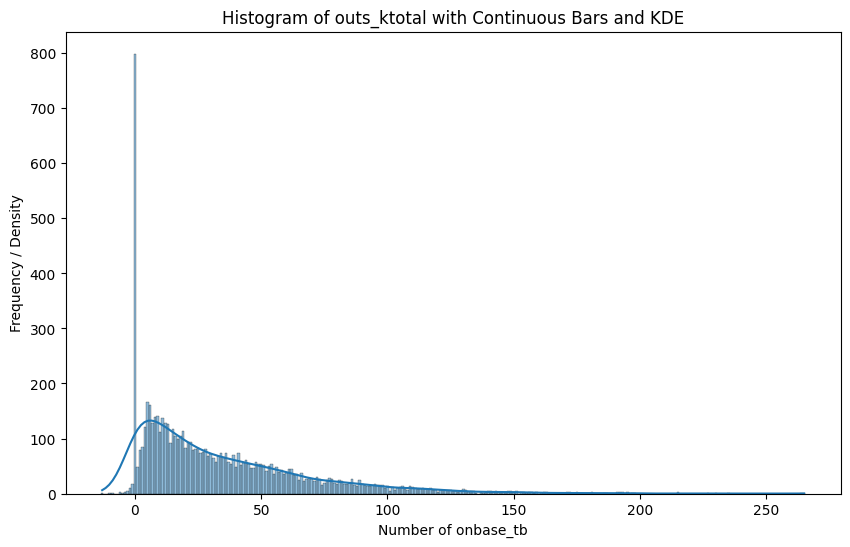

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your final training data is in a DataFrame called final_training_df
target_variable = final_training_df['receiving_yards']

plt.figure(figsize=(10, 6))
sns.histplot(target_variable, kde=True, discrete=True)
plt.title('Histogram of outs_ktotal with Continuous Bars and KDE')
plt.xlabel('Number of onbase_tb')
plt.ylabel('Frequency / Density')
plt.show()

In [55]:
target_variable.unique()

array([ 37.,  90., 116.,  16., 108.,  22.,  89., 139.,  98.,  34.,  77.,
       109., 265.,  59.,  11.,  86.,  35.,  60.,  42.,  66.,   3.,  55.,
        12.,  95.,  10.,  56.,   8.,   0.,  33.,  36., 127.,  75.,  25.,
       130., 107.,  -1.,  45.,  38.,  58.,  19.,  47., 195., 131.,  50.,
        85.,  29.,  57., 113.,  26.,  53., 111.,  74.,  91.,  48.,  87.,
       215.,  40., 157., 181., 163.,  88., 112.,  62., 146., 102.,  61.,
        99.,  76.,  82.,  24.,  23.,  69.,  72.,  80.,  83., 115., 105.,
        20.,  13.,   5.,   2.,  31.,  18.,  41.,  30.,  27.,   6.,  14.,
        28.,  -6.,  44.,   9.,  79.,  43.,   4.,  97.,  70.,  64.,   7.,
       120.,  21.,  39.,  51.,  17.,  68.,  15.,  65.,  63.,  67.,  54.,
        49.,  32.,  92., 106.,  46.,  71., -13.,  78., 121., 114.,  52.,
       142.,  -4., 144.,  -9.,  73., 100., 119., 147., 154.,  84., 164.,
       118., 123., 117., 162., 129.,   1.,  81.,  96.,  -3.,  -2., 104.,
        94., 138., 122., 145., 149., 126., -10., 12

In [56]:
print((target_variable.value_counts(normalize=True).sort_index()))

receiving_yards
-13.0     0.000147
-10.0     0.000147
-9.0      0.000147
-6.0      0.000294
-5.0      0.000147
-4.0      0.000441
-3.0      0.000735
-2.0      0.001617
-1.0      0.002647
 0.0      0.117483
 1.0      0.007205
 2.0      0.011616
 3.0      0.012351
 4.0      0.017792
 5.0      0.024408
 6.0      0.023526
 7.0      0.018821
 8.0      0.020438
 9.0      0.020585
 10.0     0.016321
 11.0     0.020291
 12.0     0.018968
 13.0     0.018527
 14.0     0.013527
 15.0     0.017350
 16.0     0.015292
 17.0     0.014557
 18.0     0.015292
 19.0     0.016762
 20.0     0.012204
 21.0     0.013674
 22.0     0.013674
 23.0     0.011763
 24.0     0.011910
 25.0     0.012057
 26.0     0.010881
 27.0     0.011175
 28.0     0.011910
 29.0     0.009999
 30.0     0.010587
 31.0     0.009557
 32.0     0.008381
 33.0     0.010146
 34.0     0.010881
 35.0     0.009704
 36.0     0.010881
 37.0     0.008528
 38.0     0.007793
 39.0     0.010293
 40.0     0.007205
 41.0     0.010881
 42.0     0.007

In [57]:
# import numpy as np

# Specify the column for analysis
col = 'receiving_yards'

# Calculate variance
variance = final_training_df[col].var()
print(f"Variance ({col}): {variance}")

# Calculate standard deviation
std_dev = final_training_df[col].std()
print(f"Standard Deviation ({col}): {std_dev}")

# Calculate range
range_val = final_training_df[col].max() - final_training_df[col].min()
print(f"Range ({col}): {range_val}")

# Calculate interquartile range (IQR)
q1 = final_training_df[col].quantile(0.25)
q3 = final_training_df[col].quantile(0.75)
iqr = q3 - q1
print(f"IQR ({col}): {iqr}")

# Calculate mean absolute deviation (MAD)
mean_val = final_training_df[col].mean()
print(f"Mean ({col}): {mean_val}")  # <--- This line prints the mean
mad = np.mean(np.abs(final_training_df[col] - mean_val))
print(f"Mean Absolute Deviation ({col}): {mad}")

# Calculate coefficient of variation (CV)
cv = (std_dev / mean_val) * 100
print(f"Coefficient of Variation (%) ({col}): {cv}")

# Calculate variance-to-mean ratio (for count data)
if mean_val != 0:
    variance_to_mean = variance / mean_val
    print(f"Variance-to-Mean Ratio ({col}): {variance_to_mean}")
else:
    print(f"Mean is zero for {col}, cannot calculate Variance-to-Mean Ratio.")


Variance (receiving_yards): 1167.8458465883045
Standard Deviation (receiving_yards): 34.17375962033303
Range (receiving_yards): 278.0
IQR (receiving_yards): 42.0
Mean (receiving_yards): 33.921188060579325
Mean Absolute Deviation (receiving_yards): 26.327461033790645
Coefficient of Variation (%) (receiving_yards): 100.74458347184844
Variance-to-Mean Ratio (receiving_yards): 34.428211786175254


In [58]:
X = final_training_df.drop(columns=['receiving_yards'])
y = final_training_df['receiving_yards']

In [59]:
X.columns

Index(['venue_capacity', 'venue_surface', 'venue_roof_type',
       'receiving_first_downs_prev_7_games_career_sum',
       'receiving_receptions_prev_7_games_career_sum',
       'receiving_targets_prev_7_games_career_sum',
       'receiving_yards_prev_7_games_career_sum',
       'receiving_avg_yards_prev_7_games_career_mean',
       'receiving_longest_prev_7_games_career_mean',
       'receiving_touchdowns_prev_7_games_career_sum',
       'receiving_yards_after_catch_prev_7_games_career_sum',
       'receiving_redzone_targets_prev_7_games_career_sum',
       'receiving_air_yards_prev_7_games_career_sum',
       'receiving_broken_tackles_prev_7_games_career_sum',
       'receiving_dropped_passes_prev_7_games_career_sum',
       'receiving_catchable_passes_prev_7_games_career_sum',
       'receiving_yards_after_contact_prev_7_games_career_sum',
       'defense_tackles_prev_7_games_career_sum',
       'defense_assists_prev_7_games_career_sum',
       'defense_combined_prev_7_games_career

In [60]:
X.shape

(6801, 53)

In [61]:
X.dtypes

venue_capacity                                               int64
venue_surface                                                int64
venue_roof_type                                              int64
receiving_first_downs_prev_7_games_career_sum              float64
receiving_receptions_prev_7_games_career_sum               float64
receiving_targets_prev_7_games_career_sum                  float64
receiving_yards_prev_7_games_career_sum                    float64
receiving_avg_yards_prev_7_games_career_mean               float64
receiving_longest_prev_7_games_career_mean                 float64
receiving_touchdowns_prev_7_games_career_sum               float64
receiving_yards_after_catch_prev_7_games_career_sum        float64
receiving_redzone_targets_prev_7_games_career_sum          float64
receiving_air_yards_prev_7_games_career_sum                float64
receiving_broken_tackles_prev_7_games_career_sum           float64
receiving_dropped_passes_prev_7_games_career_sum           flo

In [62]:
# X.to_csv('../../../data/spain_soccer_shots_on_target_training_data_v002.csv', index= False)

In [63]:
for column in X.columns:
    # Check if the column is of boolean type
    if X[column].dtype == 'bool':
        # Convert the boolean column to integers (1 for True, 0 for False)
        X[column] = X[column].astype(int)

In [64]:
# X['opponent'] = X['opponent'].apply(lambda x:str(x))

#### poisson regressor

In [65]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Example: X (features), y (strikeouts)
# X = sm.add_constant(X)  # statsmodels requires constant
# Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train=X,y

In [66]:
print(X_train.dtypes, y_train.dtypes)

venue_capacity                                               int64
venue_surface                                                int64
venue_roof_type                                              int64
receiving_first_downs_prev_7_games_career_sum              float64
receiving_receptions_prev_7_games_career_sum               float64
receiving_targets_prev_7_games_career_sum                  float64
receiving_yards_prev_7_games_career_sum                    float64
receiving_avg_yards_prev_7_games_career_mean               float64
receiving_longest_prev_7_games_career_mean                 float64
receiving_touchdowns_prev_7_games_career_sum               float64
receiving_yards_after_catch_prev_7_games_career_sum        float64
receiving_redzone_targets_prev_7_games_career_sum          float64
receiving_air_yards_prev_7_games_career_sum                float64
receiving_broken_tackles_prev_7_games_career_sum           float64
receiving_dropped_passes_prev_7_games_career_sum           flo

#### Poisson Regressor

In [67]:
# poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Predict expected strikeouts (λ)
# lambda_pred = poisson_model.predict(X_train)

In [68]:
# deviance = poisson_model.deviance
# aic = poisson_model.aic
# model_df = poisson_model.df_model
# residual_df = poisson_model.df_resid

# print("Deviance:", deviance)
# print("AIC:", aic)
# print(f"Model Degrees of Freedom: {model_df}")
# print(f"Residual Degrees of Freedom: {residual_df}")
# print(f'devience to residual df ratio: {deviance/residual_df}')

In [69]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100,  # Number of trees in the forest
                                 random_state=42,
                                 n_jobs=-1,       # Use all available cores
                                 max_depth=10,    # Maximum depth of the trees (tune this)
                                 min_samples_split=2, # Minimum samples required to split a node (tune this)
                                 min_samples_leaf=1)  # Minimum samples required at a leaf node (tune this)

rf_model.fit(X_train, y_train)

# Make predictions on the test set
# y_pred = rf_model.predict(X_test)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# with open('../../../models/nfl_wr_receiving_yards_2023_24_entire_data_player_opponent_stats_v003.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [71]:
stop

NameError: name 'stop' is not defined

##### function to calculate the prediction and the over and under probability

In [ ]:
def predict(model, y_test, threshold):

    strikeout_prediction = model.predict(y_test)
    y_test = y_test.values.reshape(1, -1) \
                              if isinstance(y_test, pd.Series) \
                              else y_test.reshape(1, -1)
    
    preds_array = np.array([tree.predict(y_test)[0] for tree in model.estimators_])

    mean_pred = np.mean(preds_array)
    std_dev_pred = np.std(preds_array)

    # Create the fitted normal distribution
    fitted_normal_dist = norm(loc=mean_pred, scale=std_dev_pred)

    if std_dev_pred == 0:
        prob_over_threshold = 1.0 if strikeout_prediction > threshold else 0.0
        prob_under_threshold = 1.0 - prob_over_threshold
    else:
        # Create the fitted normal distribution
        fitted_normal_dist = norm(loc=mean_pred, scale=std_dev_pred)

        # Calculate probability over the threshold (Survival Function)
        prob_over_threshold = fitted_normal_dist.sf(threshold)

        # Calculate probability under the threshold (Cumulative Distribution Function)
        prob_under_threshold = fitted_normal_dist.cdf(threshold)

    print(f"Overall Prediction: {strikeout_prediction:.4f}")
    print(f"Parametric P(X > {threshold}) (Over Probability): {prob_over_threshold:.4f}")
    print(f"Parametric P(X <= {threshold}) (Under Probability): {prob_under_threshold:.4f}")

    return {
        'overall_prediction': strikeout_prediction,
        'prob_over_threshold': prob_over_threshold,
        'prob_under_threshold': prob_under_threshold
    }
        

##### calculate the over probability using prediction distribution

In [ ]:
X_exp = X_test.iloc[0]
y_exp = y_test.iloc[0]

X_exp = X_exp.values.reshape(1, -1) \
                              if isinstance(X_exp, pd.Series) \
                              else X_exp.reshape(1, -1)
X_exp

array([[6.70000000e+04, 0.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.29000000e+02, 1.56000000e+02, 3.85000000e+02,
        1.30000000e+01, 9.50000000e+01, 8.00000000e+00, 4.50000000e+01,
        2.00000000e+00, 3.00000000e+00, 3.00000000e+01, 2.50000000e+01,
        1.22000000e+02, 0.00000000e+00, 6.50000000e+01, 2.00000000e+01,
        1.40000000e+01, 2.80000000e+01, 6.00000000e+00, 2.36000000e+02,
        1.40000000e+02, 1.80000000e+01, 5.00000000e+00, 1.20000000e+01,
        6.00000000e+00, 2.85714286e+01, 2.40000000e+01, 9.00000000e+00,
        3.42857143e+01, 1.08000000e+02, 3.70000000e+01, 3.45407143e+01,
        1.10000000e+01, 6.00000000e+00, 3.09524286e+01]])

In [ ]:
trees = rf_model.estimators_
# trees

In [ ]:
# all_preds = [tree.predict(X_exp) for tree in trees]
# all_preds
all_predictions = []
for tree in trees:
    predictions = tree.predict(X_exp)
    all_predictions.append(predictions)
all_predictions

[array([9.66563467]),
 array([14.16756757]),
 array([7.11371237]),
 array([10.90703218]),
 array([11.14285714]),
 array([7.82685512]),
 array([9.39948454]),
 array([7.99358974]),
 array([11.01043025]),
 array([9.99368088]),
 array([10.11864407]),
 array([11.45502646]),
 array([11.19831224]),
 array([11.7002551]),
 array([11.38]),
 array([13.14112903]),
 array([5.52941176]),
 array([10.51008646]),
 array([9.13582677]),
 array([19.68333333]),
 array([14.47260274]),
 array([10.58128079]),
 array([11.24766977]),
 array([9.87856072]),
 array([12.16097561]),
 array([9.92514395]),
 array([22.62222222]),
 array([9.34592445]),
 array([12.83695652]),
 array([10.2993921]),
 array([12.14444444]),
 array([13.29825949]),
 array([11.10055866]),
 array([11.27404719]),
 array([15.26666667]),
 array([12.90494297]),
 array([12.88663968]),
 array([9.26879271]),
 array([25.3125]),
 array([12.84962406]),
 array([16.22340426]),
 array([11.15132924]),
 array([14.859375]),
 array([10.33136095]),
 array([4.7894

In [ ]:
preds_array = np.array([arr[0] for arr in all_predictions])

preds_array

array([ 9.66563467, 14.16756757,  7.11371237, 10.90703218, 11.14285714,
        7.82685512,  9.39948454,  7.99358974, 11.01043025,  9.99368088,
       10.11864407, 11.45502646, 11.19831224, 11.7002551 , 11.38      ,
       13.14112903,  5.52941176, 10.51008646,  9.13582677, 19.68333333,
       14.47260274, 10.58128079, 11.24766977,  9.87856072, 12.16097561,
        9.92514395, 22.62222222,  9.34592445, 12.83695652, 10.2993921 ,
       12.14444444, 13.29825949, 11.10055866, 11.27404719, 15.26666667,
       12.90494297, 12.88663968,  9.26879271, 25.3125    , 12.84962406,
       16.22340426, 11.15132924, 14.859375  , 10.33136095,  4.78947368,
       20.91603053,  6.        , 10.74550129, 14.69550637, 13.45454545,
       11.98639456,  8.9943662 ,  8.05263158, 16.28832117, 14.26296296,
       13.47230769, 11.34482759, 12.98916667, 12.54583333, 11.18447837,
       10.79500891, 21.34615385, 15.60949868, 13.81      , 11.48076923,
       12.36397059,  8.82835821, 20.67567568, 17.4893617 ,  9.90

In [ ]:
pred_err = preds_array-y_exp
pred_err

array([ 9.66563467, 14.16756757,  7.11371237, 10.90703218, 11.14285714,
        7.82685512,  9.39948454,  7.99358974, 11.01043025,  9.99368088,
       10.11864407, 11.45502646, 11.19831224, 11.7002551 , 11.38      ,
       13.14112903,  5.52941176, 10.51008646,  9.13582677, 19.68333333,
       14.47260274, 10.58128079, 11.24766977,  9.87856072, 12.16097561,
        9.92514395, 22.62222222,  9.34592445, 12.83695652, 10.2993921 ,
       12.14444444, 13.29825949, 11.10055866, 11.27404719, 15.26666667,
       12.90494297, 12.88663968,  9.26879271, 25.3125    , 12.84962406,
       16.22340426, 11.15132924, 14.859375  , 10.33136095,  4.78947368,
       20.91603053,  6.        , 10.74550129, 14.69550637, 13.45454545,
       11.98639456,  8.9943662 ,  8.05263158, 16.28832117, 14.26296296,
       13.47230769, 11.34482759, 12.98916667, 12.54583333, 11.18447837,
       10.79500891, 21.34615385, 15.60949868, 13.81      , 11.48076923,
       12.36397059,  8.82835821, 20.67567568, 17.4893617 ,  9.90

In [ ]:
np.mean(preds_array)

np.float64(12.212650879115762)

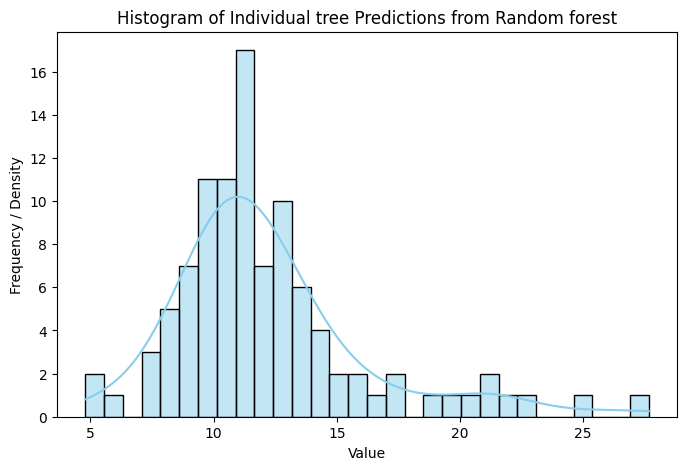

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5)) # Optional: Set figure size for better readability

sns.histplot(data=preds_array, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency / Density") # Y-axis label changes if kde=True
plt.title("Histogram of Individual tree Predictions from Random forest")

# Display the plot
plt.show()

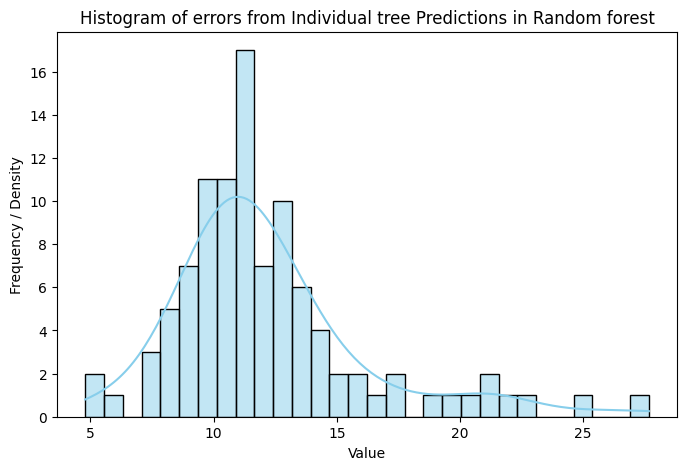

In [ ]:
plt.figure(figsize=(8, 5)) # Optional: Set figure size for better readability

sns.histplot(data=pred_err, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency / Density") # Y-axis label changes if kde=True
plt.title("Histogram of errors from Individual tree Predictions in Random forest")

# Display the plot
plt.show()

In [ ]:
# with open('../../../models/spain_soccer_rf_2024_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 876.79
Mean Absolute Error (MAE): 21.44
R-squared (R2): 0.27


In [ ]:
# Note on handling count data with RandomForestRegressor:
# RandomForestRegressor predicts continuous values. For count data, the predictions will be floating-point numbers.
# You might want to round these predictions to the nearest integer for interpretation as counts.
y_pred_rounded = np.round(y_pred).astype(int)

print("\nRounded Predictions (first 20):")
print(y_pred_rounded[:20])
print("\nActual Test Values (first 20):")
print(y_test.head(20).values)

# Evaluate rounded predictions (
mse_rounded = mean_squared_error(y_test, y_pred_rounded)
mae_rounded = mean_absolute_error(y_test, y_pred_rounded)
r2_rounded = r2_score(y_test, y_pred_rounded)

print("\nRandom Forest Regressor Evaluation (Rounded Predictions):")
print(f"Mean Squared Error (MSE): {mse_rounded:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rounded:.2f}")
print(f"R-squared (R2): {r2_rounded:.2f}")


Rounded Predictions (first 20):
[12 60 48 56 37 62 33 23 43 44 15 28 28 35 48 25 20 16 69 54]

Actual Test Values (first 20):
[  0.  80.  26.  89.  36.  12.  31.  42.  96.  15.   7.  35.  60.   0.
  54.  30.   1.  54. 100.  12.]

Random Forest Regressor Evaluation (Rounded Predictions):
Mean Squared Error (MSE): 877.18
Mean Absolute Error (MAE): 21.44
R-squared (R2): 0.27


In [ ]:
# Define the bins (bucket boundaries)
bins = [-1, 0, 5, 10, 50, 100, 200, 400, float('inf')] # -1 to capture exactly 0, float('inf') for the open-ended last bucket

# Define the labels for each bucket
labels = ['<0', '0-5', '5-10', '10-50', '50-100', '100-200', '200-400', '400+']

# Use pd.cut to categorize the data into buckets
y_test_buckets = pd.cut(y_train, bins=bins, labels=labels, right=False)
# 'right=False' means the bins include the left boundary but exclude the right boundary,
# e.g., [0, 5) means 0 up to (but not including) 5.

# Get the count of values in each bucket
distribution = y_test_buckets.value_counts().sort_index()
print(distribution)

receiving_yards
<0           16
0-5         878
5-10        563
10-50      2380
50-100     1045
100-200     283
200-400       5
400+          0
Name: count, dtype: int64


In [ ]:
# # Assuming X_test contains the features for prediction
# y_pred = rf_model.predict(X_test)

# # Assuming y_test is a DataFrame or you want to create one for results
# # If y_test is a Series, convert it to a DataFrame first if you want to add a new column
# if isinstance(y_test, pd.Series):
#     y_test_df = y_test.to_frame(name='actual_values') # Name the column appropriately
# else:
#     y_test_df = y_test

# y_test_df['preds'] = y_pred
# y_test_df.to_csv('../../../data/spain_soccer_shots_on_target_y_test.csv', index=False)

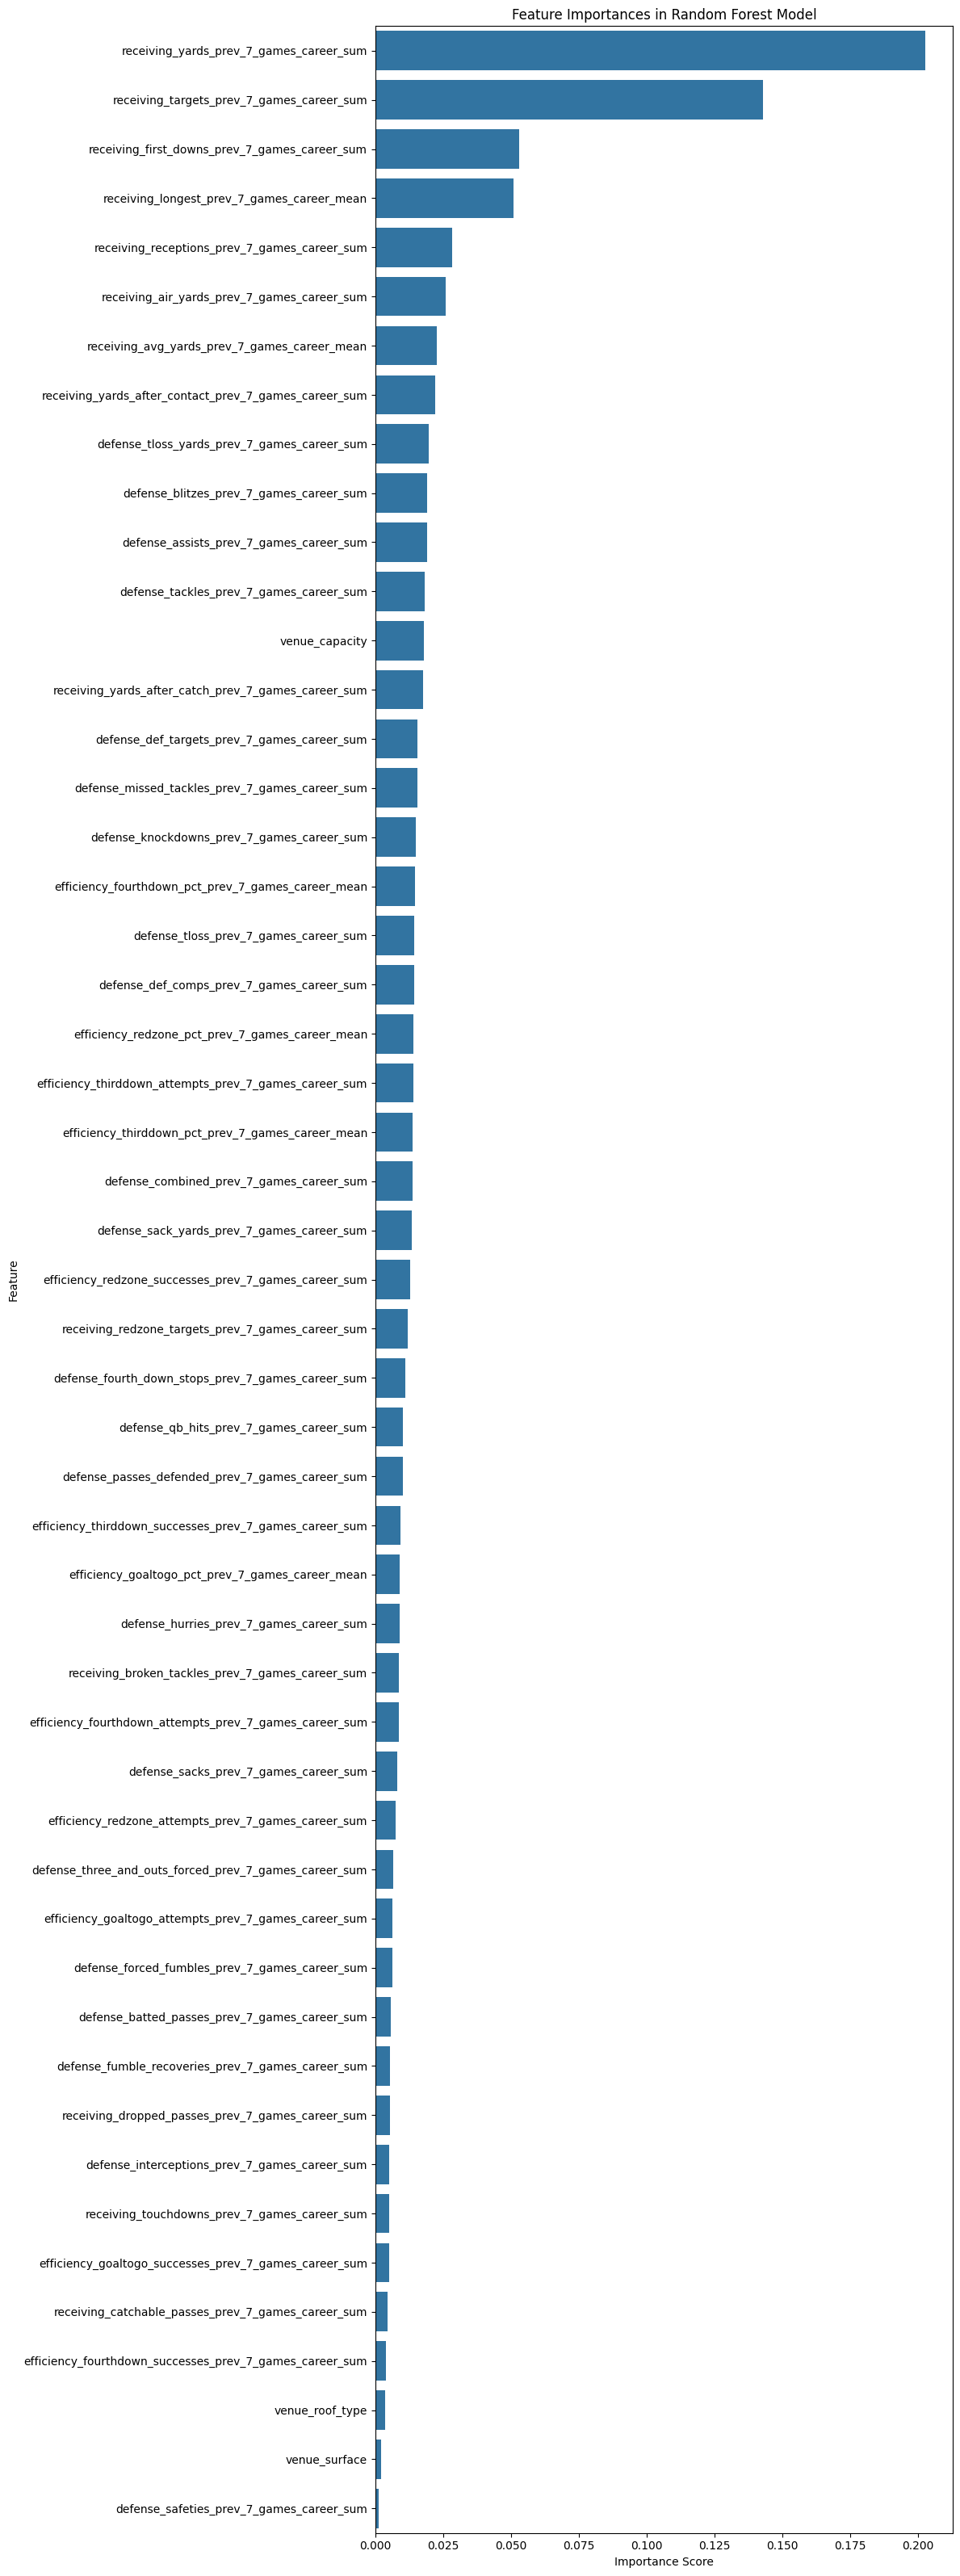


Feature Importance:
receiving_yards_prev_7_games_career_sum: 0.2027
receiving_targets_prev_7_games_career_sum: 0.1430
receiving_first_downs_prev_7_games_career_sum: 0.0530
receiving_longest_prev_7_games_career_mean: 0.0510
receiving_receptions_prev_7_games_career_sum: 0.0283
receiving_air_yards_prev_7_games_career_sum: 0.0260
receiving_avg_yards_prev_7_games_career_mean: 0.0226
receiving_yards_after_contact_prev_7_games_career_sum: 0.0219
defense_tloss_yards_prev_7_games_career_sum: 0.0196
defense_blitzes_prev_7_games_career_sum: 0.0192
defense_assists_prev_7_games_career_sum: 0.0191
defense_tackles_prev_7_games_career_sum: 0.0181
venue_capacity: 0.0178
receiving_yards_after_catch_prev_7_games_career_sum: 0.0176
defense_def_targets_prev_7_games_career_sum: 0.0155
defense_missed_tackles_prev_7_games_career_sum: 0.0154
defense_knockdowns_prev_7_games_career_sum: 0.0150
efficiency_fourthdown_pct_prev_7_games_career_mean: 0.0145
defense_tloss_prev_7_games_career_sum: 0.0144
defense_def_co

In [ ]:
# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
sorted_feature_names = [item[0] for item in sorted_importance]
sorted_importances = [item[1] for item in sorted_importance]

# Create the bar plot
plt.figure(figsize=(12, 32))
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

In [ ]:
with open('../../../../models/nfl_wr_receiving_yards_2023_24_player_opponent_stats_v001.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [ ]:
to stop the execution of the script here

SyntaxError: invalid syntax (3122771044.py, line 1)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

n_splits = 5 # For example, 5-fold cross-validation

print(f"Performing {n_splits}-fold cross-validation...")

# --- Evaluate using Mean Squared Error (MSE) ---
# cross_val_score by default tries to maximize the score, so for MSE (which is a loss),
# we need to specify 'neg_mean_squared_error' and then negate the result.
mse_scores = -cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='neg_mean_squared_error', n_jobs=-1)
print(f"Cross-validated MSE scores for each fold: {mse_scores}")
print(f"Mean Cross-validated MSE: {np.mean(mse_scores):.4f}")
print(f"Standard Deviation of Cross-validated MSE: {np.std(mse_scores):.4f}")

print("\n" + "="*50 + "\n")

# --- Evaluate using Mean Absolute Error (MAE) ---
mae_scores = -cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='neg_mean_absolute_error', n_jobs=-1)
print(f"Cross-validated MAE scores for each fold: {mae_scores}")
print(f"Mean Cross-validated MAE: {np.mean(mae_scores):.4f}")
print(f"Standard Deviation of Cross-validated MAE: {np.std(mae_scores):.4f}")

print("\n" + "="*50 + "\n")

# --- Evaluate using R-squared (R2) ---
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='r2', n_jobs=-1)
print(f"Cross-validated R2 scores for each fold: {r2_scores}")
print(f"Mean Cross-validated R2: {np.mean(r2_scores):.4f}")
print(f"Standard Deviation of Cross-validated R2: {np.std(r2_scores):.4f}")

print("\nCross-validation complete.")


Performing 5-fold cross-validation...
Cross-validated MSE scores for each fold: [7096.81764026 8090.01563529 6566.38425663 8721.79183094 7777.67167597]
Mean Cross-validated MSE: 7650.5362
Standard Deviation of Cross-validated MSE: 753.5096


Cross-validated MAE scores for each fold: [68.0152461  71.00851879 63.70976957 74.9660678  70.09437392]
Mean Cross-validated MAE: 69.5588
Standard Deviation of Cross-validated MAE: 3.6938


Cross-validated R2 scores for each fold: [0.25930297 0.15045022 0.30746889 0.14410036 0.15539288]
Mean Cross-validated R2: 0.2033
Standard Deviation of Cross-validated R2: 0.0672

Cross-validation complete.


In [ ]:
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter Tuning with GridSearchCV ---
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees
    'max_depth': [None, 10, 20],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
# We use 'neg_mean_squared_error' as the scoring metric for tuning
# cv=n_splits ensures that tuning is also done with cross-validation
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=n_splits,
                           scoring='neg_mean_squared_error', # Use a single metric for tuning
                           n_jobs=-1,
                           verbose=2) # Set verbose to 2 to see progress

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("\nHyperparameter tuning complete.")

# Print the best parameters and best score found
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated MSE (negative, so smaller absolute value is better): {-grid_search.best_score_:.4f}")

# Get the best model
best_rf_model = grid_search.best_estimator_
print("\nBest Random Forest Regressor model (after tuning):")
print(best_rf_model)

# You can now use best_rf_model for final predictions on X_test
# For example:
y_pred_tuned = best_rf_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"\nMSE on test set with tuned model: {mse_tuned:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Hyperparameter tuning complete.
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validated MSE (negative, so smaller absolute value is better): 7606.5450

Best Random Forest Regressor model (after tuning):
RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      n_jobs=-1, random_state=42)

MSE on test set with tuned model: 7068.4035


In [ ]:
rf_model_hp_tuned = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42)

rf_model_hp_tuned.fit(X_train, y_train)

y_preds_hp = rf_model_hp_tuned.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_preds_hp)
mae = mean_absolute_error(y_test, y_preds_hp)
r2 = r2_score(y_test, y_preds_hp)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 7068.40
Mean Absolute Error (MAE): 68.15
R-squared (R2): 0.25


In [ ]:
# with open('../../../models/spain_soccer_strikeouts_rf_hp_tuned_2024_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)
# with open('../../../../models/nfl_qb_passing_yards_v002.pkl', 'wb') as f:
#     pickle.dump(rf_model_hp_tuned, f)

In [ ]:
print("Fitting Zero-Inflated Poisson (ZIP) Model...")
try:
    zip_model = sm.ZeroInflatedPoisson(
        endog=y_train,        # Dependent variable (counts)
        exog=X_train,         # Independent variables for the count part (Poisson) - now includes constant
        exog_infl=X_train     # Independent variables for the zero-inflation part (logistic) - now includes constant
    )

    # Fit the model
    zip_results = zip_model.fit()

    print("\nZIP Model Summary:")
    print(zip_results.summary())
    print("-" * 50)

    # --- 3. Make Predictions ---
    # Predictions from ZeroInflatedPoisson are expected values (can be float)
    y_pred_zip_continuous = zip_results.predict(exog=X_test, exog_infl=X_test) # Updated: Use X_test directly

    # Since the target is counts, post-process by rounding and ensuring non-negativity
    y_pred_zip_final = np.round(y_pred_zip_continuous)
    y_pred_zip_final = np.maximum(0, y_pred_zip_final) # Ensure no negative counts

    print("\nPredictions made and post-processed.")
    print(f"Sample of continuous predictions: {y_pred_zip_continuous[:5]}")
    print(f"Sample of final (rounded & clipped) predictions: {y_pred_zip_final[:5]}")
    print("-" * 50)

    # --- 4. Evaluate the Model ---
    print("Evaluating ZIP Model performance:")
    mse = mean_squared_error(y_test, y_pred_zip_final)
    mae = mean_absolute_error(y_test, y_pred_zip_final)
    r2 = r2_score(y_test, y_pred_zip_final)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-" * 50)

except Exception as e:
    print(f"An error occurred during model fitting or prediction: {e}")
    print("Please ensure your 'endog' (y) values are non-negative and your 'exog' (X) values are appropriate.")
    print("Also, ensure 'statsmodels' is installed (`pip install statsmodels`).")

Fitting Zero-Inflated Poisson (ZIP) Model...


C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:1331: RuntimeWarning: overflow encountered in exp
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pytho

         Current function value: 4251.490799
         Iterations: 5
         Function evaluations: 48
         Gradient evaluations: 27


C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:629: RuntimeWarning: overflow encountered in exp
  coeff = (1 + w[zero_idx] * (np.exp(mu[zero_idx]) - 1))
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:637: RuntimeWarning: overflow encountered in exp
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:637: RuntimeWarning: invalid value encountered in divide
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\si


ZIP Model Summary:
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:             runs_earned   No. Observations:                15773
Model:             ZeroInflatedPoisson   Df Residuals:                    15593
Method:                            MLE   Df Model:                          179
Date:                 Tue, 27 May 2025   Pseudo R-squ.:                  -3171.
Time:                         10:51:40   Log-Likelihood:            -6.7059e+07
converged:                       False   LL-Null:                       -21141.
Covariance Type:             nonrobust   LLR p-value:                     1.000
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
inflate_venue_capacity                                                

C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
